In [1]:
import sys
print(sys.executable)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\python.exe


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import os

In [4]:
df1 = pd.read_csv('DATASET PT. KREASI PUTRA HOTAMA 2025 - Data.csv')  # File dengan Customer_id
df2 = pd.read_csv('DATASET PT. KREASI PUTRA HOTAMA 2025 - Data2.csv')  # File dengan Customer_name

df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

df1['Order_date'] = pd.to_datetime(df1['Order_date'])
df2['Order_date'] = pd.to_datetime(df2['Order_date'])


merged_df = pd.merge(
    df2, df1,
    on=['Order_id', 'Product_code', 'Product_Name', 'Quantity', 'Order_date', 'Price'],
    how='inner'
)

final_df = merged_df[['Customer_name', 'Customer_id', 'Order_id', 'Product_code', 'Product_Name', 'Quantity', 'Order_date', 'Price']]

print(final_df.head(10))  

                     Customer_name  Customer_id  \
0                             Riya    1473989.0   
1                 awaluddin syakib    1473740.0   
2                    Halim Ferdian    1474653.0   
3                       jelyy 1129    1474724.0   
4                       jelyy 1129    1474724.0   
5                 Shakila Al hilma    1474750.0   
6                             ilma    1460167.0   
7           Nizam Malik Al ghifari    1474010.0   
8  Keysha NadirSalsabila Salsabila    1470296.0   
9                 Prihantari Pipuk     133248.0   

                                Order_id  Product_code  \
0                    Voucher-81293-68089           131   
1  voucher-1473740-1735683042-1DJ80saH5O            37   
2  voucher-1474653-1735685375-2Fs4x0s3Q2            34   
3                    Voucher-81331-67818           131   
4  voucher-1474724-1735694368-BSbrGeUmOX            37   
5                    Voucher-81337-71595           131   
6                    Voucher-813

In [5]:
# Ubah Customer_id dari float ke int, lalu ke string (agar hilang .0)
final_df['Customer_id'] = final_df['Customer_id'].astype(int).astype(str)

# (Opsional) Juga ubah Customer_name jadi string bersih
final_df['Customer_name'] = final_df['Customer_name'].astype(str).str.strip()

# Tampilkan hasil akhir
print(final_df.head(10))

final_df.to_csv('DATASET PT. KREASI PUTRA HOTAMA 2025 - hasil_merge.csv', index=False)
print("File 'hasil_merge.csv' berhasil dibuat.")

                     Customer_name Customer_id  \
0                             Riya     1473989   
1                 awaluddin syakib     1473740   
2                    Halim Ferdian     1474653   
3                       jelyy 1129     1474724   
4                       jelyy 1129     1474724   
5                 Shakila Al hilma     1474750   
6                             ilma     1460167   
7           Nizam Malik Al ghifari     1474010   
8  Keysha NadirSalsabila Salsabila     1470296   
9                 Prihantari Pipuk      133248   

                                Order_id  Product_code  \
0                    Voucher-81293-68089           131   
1  voucher-1473740-1735683042-1DJ80saH5O            37   
2  voucher-1474653-1735685375-2Fs4x0s3Q2            34   
3                    Voucher-81331-67818           131   
4  voucher-1474724-1735694368-BSbrGeUmOX            37   
5                    Voucher-81337-71595           131   
6                    Voucher-81339-97819   

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14557 entries, 0 to 14556
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer_name  14557 non-null  object        
 1   Customer_id    14557 non-null  object        
 2   Order_id       5362 non-null   object        
 3   Product_code   14557 non-null  int64         
 4   Product_Name   14557 non-null  object        
 5   Quantity       14557 non-null  int64         
 6   Order_date     14557 non-null  datetime64[ns]
 7   Price          14557 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 909.9+ KB


In [109]:
file_path = "DATASET PT. KREASI PUTRA HOTAMA 2025 - hasil_merge.csv"
df = pd.read_csv(file_path)

In [67]:
# STEP 2: Bersihkan kolom 'Price' → Hapus simbol & ubah ke numerik
df['Price_clean'] = df['Price'].astype(str) \
    .str.replace('Rp', '', regex=False) \
    .str.replace('.', '', regex=False) \
    .str.replace(',', '.', regex=False) \
    .str.strip()

df['Price_clean'] = pd.to_numeric(df['Price_clean'], errors='coerce')

In [68]:
# STEP 3: Isi Order_id kosong secara berurutan
df['Order_id'] = df['Order_id'].fillna(method='ffill')
for i in range(len(df)):
    if pd.isna(df.loc[i, 'Order_id']):
        df.loc[i, 'Order_id'] = f"Missing-{i}"

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30080\2173976707.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Order_id'] = df['Order_id'].fillna(method='ffill')


In [69]:
# STEP 4: Hapus baris dengan data penting yang masih kosong
df_clean = df.dropna(subset=['Customer_id', 'Order_date', 'Price_clean']).copy()

In [70]:
# STEP 5: Hitung 'Total_Transaksi' dan filter > 0
df_clean['Total_Transaksi'] = df_clean['Quantity'] * df_clean['Price_clean']
df_clean = df_clean[df_clean['Total_Transaksi'] > 0]

In [71]:
# STEP 6: Ubah Order_date ke format datetime
df_clean['Order_date'] = pd.to_datetime(df_clean['Order_date'], errors='coerce')

In [72]:
display(df_clean.head(100))
df_clean.to_csv("data_bersih.csv", index=False)

,Customer_name,Customer_id,Order_id,Product_code,Product_Name,Quantity,Order_date,Price,Price_clean,Total_Transaksi
1,awaluddin syakib,1473740,voucher-1473740-1735683042-1DJ80saH5O,37,Qaraa PRO 1 Tahun,1,2025-01-01 05:10:42,Rp300.000,300000,300000
2,Halim Ferdian,1474653,voucher-1474653-1735685375-2Fs4x0s3Q2,34,Qaraa PRO 1 Bulan,1,2025-01-01 05:49:35,Rp50.000,50000,50000
4,jelyy 1129,1474724,voucher-1474724-1735694368-BSbrGeUmOX,37,Qaraa PRO 1 Tahun,1,2025-01-01 08:19:28,Rp300.000,300000,300000
6,ilma,1460167,Voucher-81339-97819,155,Flash Sale Akhir Tahun 1 Tahun,1,2025-01-01 09:49:21,Rp249.000,249000,249000
7,Nizam Malik Al ghifari,1474010,voucher-1474010-1735701008-wqwbQMZVD9,34,Qaraa PRO 1 Bulan,1,2025-01-01 10:10:08,Rp50.000,50000,50000
...,...,...,...,...,...,...,...,...,...,...
115,Tika Maryadita,1471333,voucher-1471333-1735997589-YS6zOZTmhi,34,Qaraa PRO 1 Bulan,1,2025-01-04 20:33:09,Rp50.000,50000,50000
116,Siti Khadijah,1012406,voucher-1012406-1736029528-aJJaqohlVG,34,Qaraa PRO 1 Bulan,1,2025-01-05 05:25:28,Rp50.000,50000,50000
119,Richna Nisrina,1404875,voucher-1404875-1736066595-NmtU5x4klt,37,Qaraa PRO 1 Tahun,1,2025-01-05 15:43:15,Rp300.000,300000,300000
120,Richna Nisrina,1404875,voucher-1404875-1736066794-wHQtUl25Mj,37,Qaraa PRO 1 Tahun,1,2025-01-05 15:46:34,Rp300.000,300000,300000


In [73]:
# STEP 7: Agregasi per Customer_id → RFM + rata-rata transaksi
ref_date = df_clean['Order_date'].max()
df_agg = df_clean.groupby('Customer_id').agg({
    'Order_id': 'count',
    'Total_Transaksi': 'sum',
    'Order_date': 'max'
}).reset_index()

df_agg.rename(columns={
    'Order_id': 'Frequency',
    'Order_date': 'Last_Order_Date'
}, inplace=True)

df_agg['Recency'] = (ref_date - df_agg['Last_Order_Date']).dt.days
df_agg['Avg_Transaction'] = (df_agg['Total_Transaksi'] / df_agg['Frequency']).fillna(0).round(0).astype(int)

In [74]:
# STEP 8: Standardisasi fitur numerik
features = df_agg[['Frequency', 'Total_Transaksi', 'Recency', 'Avg_Transaction']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [97]:
# STEP 9: Clustering dengan KMeans (k=5)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_agg['Cluster'] = kmeans.fit_predict(X_scaled)

In [98]:
# STEP 10: Ambil centroid dan transformasi balik ke skala asli
centroid_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroid_scaled)

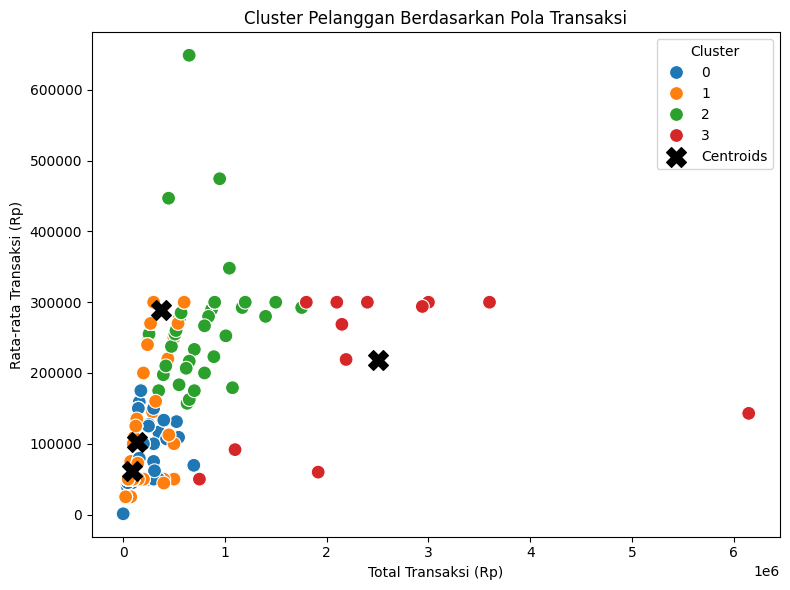

In [101]:
# STEP 11: Visualisasi Scatterplot (Total vs Rata-rata Transaksi)
os.makedirs("assets", exist_ok=True)
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_agg,
    x='Total_Transaksi',
    y='Avg_Transaction',
    hue='Cluster',
    palette='tab10',
    s=100
)
plt.scatter(
    centroids[:, 1],  # Total_Transaksi (urutan ke-1)
    centroids[:, 3],  # Avg_Transaction (urutan ke-3)
    marker='X',
    s=200,
    color='black',
    label='Centroids'
)
plt.title('Cluster Pelanggan Berdasarkan Pola Transaksi')
plt.xlabel('Total Transaksi (Rp)')
plt.ylabel('Rata-rata Transaksi (Rp)')
plt.legend(title='Cluster')
plt.tight_layout()
plt.savefig("assets/cluster_transaksi_only.webp", format='webp')
plt.show()


Menunjukkan distribusi pelanggan berdasarkan Total Transaksi dan Rata-rata Transaksi.

Centroid ditampilkan dengan tanda 'X' besar hitam ➤ membantu membedakan posisi sentral dari tiap cluster.

Outlier terlihat jelas di beberapa cluster ➤ Perlu perhatian untuk analisis lanjut jika mempengaruhi segmentasi.



In [102]:
# STEP 12: Tampilkan anggota setiap cluster
print("\nAnggota Cluster:")
for i in range(n_clusters):
    cluster_data = df_agg[df_agg['Cluster'] == i]
    print(f"\nCluster {i}:\n")
    display(cluster_data)


Anggota Cluster:

Cluster 0:



,Customer_id,Frequency,Total_Transaksi,Last_Order_Date,Recency,Avg_Transaction,Cluster
0,7,8,400000,2025-03-16 15:07:26,107,50000,0
2,22,1,50000,2025-03-01 05:08:01,122,50000,0
3,42,2,100000,2025-03-03 18:41:46,120,50000,0
4,88,7,350000,2025-02-25 15:25:19,126,50000,0
7,229,3,350000,2025-03-06 00:00:25,117,116667,0
...,...,...,...,...,...,...,...
1204,1567708,1,50000,2025-03-23 14:50:02,100,50000,0
1216,1569275,1,50000,2025-03-30 20:22:47,92,50000,0
1219,1569385,1,50000,2025-03-31 22:17:43,91,50000,0
1221,1569701,1,50000,2025-04-03 07:35:05,89,50000,0



Cluster 1:



,Customer_id,Frequency,Total_Transaksi,Last_Order_Date,Recency,Avg_Transaction,Cluster
1,15,1,200000,2025-04-27 09:46:51,65,200000,1
6,186,1,50000,2025-04-26 05:32:33,66,50000,1
9,302,3,150000,2025-05-21 13:43:36,41,50000,1
14,674,1,300000,2025-05-18 16:09:15,44,300000,1
19,1328,1,50000,2025-06-07 05:28:10,24,50000,1
...,...,...,...,...,...,...,...
1351,1583283,1,99999,2025-06-26 11:44:56,5,99999,1
1352,1583293,1,300000,2025-06-26 13:46:58,5,300000,1
1353,1583823,1,300000,2025-06-30 19:19:33,1,300000,1
1354,1583844,1,25000,2025-07-01 10:20:08,0,25000,1



Cluster 2:



,Customer_id,Frequency,Total_Transaksi,Last_Order_Date,Recency,Avg_Transaction,Cluster
10,327,1,649000,2025-02-25 18:04:26,126,649000,2
17,847,1,300000,2025-02-25 11:48:15,126,300000,2
20,1717,1,300000,2025-03-11 20:27:06,111,300000,2
21,2417,5,1500000,2025-03-16 18:43:28,107,300000,2
23,3244,4,1200000,2025-03-16 03:31:29,107,300000,2
...,...,...,...,...,...,...,...
1284,1575554,1,300000,2025-05-01 16:29:28,61,300000,2
1288,1575787,1,300000,2025-05-03 05:28:11,59,300000,2
1290,1576360,1,300000,2025-05-06 03:23:40,56,300000,2
1301,1577987,3,900000,2025-05-18 09:32:24,44,300000,2



Cluster 3:



,Customer_id,Frequency,Total_Transaksi,Last_Order_Date,Recency,Avg_Transaction,Cluster
5,147,10,3000000,2025-04-01 07:20:12,91,300000,3
12,492,8,2400000,2025-04-10 17:21:44,82,300000,3
68,67706,7,2100000,2025-03-01 05:51:02,122,300000,3
70,73647,15,750000,2025-03-08 06:23:30,115,50000,3
92,166916,12,3600000,2025-06-20 04:38:53,11,300000,3
225,908711,8,2150000,2025-05-31 18:50:55,31,268750,3
290,1288589,10,2190800,2025-03-16 06:59:48,107,219080,3
528,1476109,12,1100000,2025-01-03 14:46:07,179,91667,3
859,1507126,6,1800000,2025-03-08 20:05:29,114,300000,3
1237,1570728,32,1916800,2025-05-03 23:08:53,58,59900,3


In [80]:
# STEP 13: Tampilkan pusat cluster (Centroid)
centroid_data = {
    'Cluster': list(range(n_clusters)),
    'Frequency': centroids[:, 0],
    'Total Transaksi (Rp)': centroids[:, 1],
    'Recency (Hari)': centroids[:, 2],
    'Rata-rata Transaksi (Rp)': centroids[:, 3]
}
centroid_df = pd.DataFrame(centroid_data)
print("\nPusat Cluster (Centroids):")
print(centroid_df.to_string(index=False, formatters={
    'Frequency': '{:.2f}'.format,
    'Total Transaksi (Rp)': lambda x: f"Rp {x:,.0f}",
    'Recency (Hari)': lambda x: f"{x:.0f} hari",
    'Rata-rata Transaksi (Rp)': lambda x: f"Rp {x:,.0f}"
}))


Pusat Cluster (Centroids):
 Cluster Frequency Total Transaksi (Rp) Recency (Hari) Rata-rata Transaksi (Rp)
       0      1.42            Rp 87,124       138 hari                Rp 61,861
       1      1.50           Rp 140,952        44 hari               Rp 103,130
       2      1.32           Rp 370,892       131 hari               Rp 288,720
       3     14.42         Rp 2,507,858        80 hari               Rp 218,862


In [81]:
df_agg.groupby('Cluster').mean()

,Customer_id,Frequency,Total_Transaksi,Last_Order_Date,Recency,Avg_Transaction
Cluster,,,,,,
0,1.286086e+06,1.416667,8.712433e+04,2025-02-13 13:15:05.149999872,137.866667,61860.993333
1,1.288185e+06,1.504274,1.409524e+05,2025-05-18 21:07:34.944444416,43.547009,103130.038462
2,1.316738e+06,1.315686,3.708916e+05,2025-02-20 02:07:14.294117632,131.368627,288720.311765
3,8.515266e+05,14.416667,2.507858e+06,2025-04-12 14:50:49.833333504,79.750000,218862.000000


| **Cluster** | **Karakteristik Utama**                                                                                                                                    | **Interpretasi**                                         | **Strategi Marketing yang Disarankan**                                                       |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------- | -------------------------------------------------------------------------------------------- |
| **0**       | - Frequency: rendah (±1.42)<br>- Total Transaksi: kecil (±87.124)<br>- Recency: lama (±138 hari)<br>- Avg Transaksi: kecil (±61.861)                       | Pelanggan pasif atau hampir tidak aktif lagi             | - Kampanye reaktivasi<br>- Promo besar / diskon menarik<br>- Email reminder                  |
| **1**       | - Frequency: moderat (±1.50)<br>- Total Transaksi: menengah (±140.952)<br>- Recency: baru (±44 hari)<br>- Avg Transaksi: menengah (±103.130)               | Pelanggan aktif reguler                                  | - Follow-up berkala<br>- Upsell & cross-sell produk relevan<br>- Penawaran waktu terbatas    |
| **2**       | - Frequency: rendah (±1.32)<br>- Total Transaksi: tinggi (±370.892)<br>- Recency: lama (±131 hari)<br>- Avg Transaksi: sangat tinggi (±288.720)            | Pelanggan dengan nilai transaksi tinggi tapi jarang beli | - Loyalty program<br>- Retargeting produk serupa<br>- Bundling produk bernilai tinggi        |
| **3**       | - Frequency: sangat tinggi (±14.42)<br>- Total Transaksi: sangat tinggi (±2.507.858)<br>- Recency: sedang (±80 hari)<br>- Avg Transaksi: tinggi (±218.862) | Pelanggan loyal premium                                  | - VIP loyalty program<br>- Testimoni & referral<br>- Early access produk baru atau eksklusif |


| Cluster | Strategi Utama                         |
| ------- | -------------------------------------- |
| 3       | Loyalty Program, Premium Benefit       |
| 2       | Follow-up dengan Bundling / High-Value |
| 1       | Newsletter, Upsell & Cross-sell Produk |
| 0       | Reactivation Campaign, Diskon Menarik  |


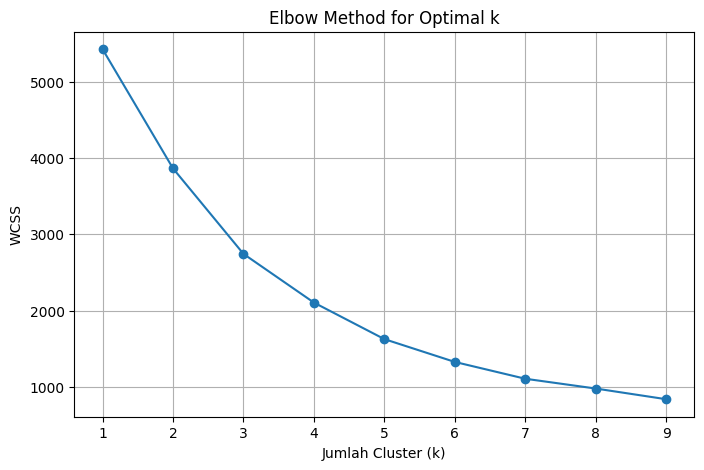

In [82]:
# Elbow Method - WCSS (Within-Cluster Sum of Squares)
wcss = []
range_k = range(1, 10)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)  # Gunakan data yang sudah distandardisasi
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow
plt.figure(figsize=(8, 5))
plt.plot(range_k, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


Terlihat "elbow" mulai melandai di k = 4 atau 5, yang menunjukkan titik optimal trade-off antara kompleksitas model dan penurunan WCSS.

In [83]:
results_dbi = []
range_k = [2, 3, 4, 5]

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    db_index = davies_bouldin_score(X_scaled, cluster_labels)
    results_dbi.append([k, db_index])

# Tampilkan hasil dalam DataFrame
df_dbi = pd.DataFrame(results_dbi, columns=['Jumlah Cluster', 'Davies-Bouldin Index'])
display(df_dbi)

,Jumlah Cluster,Davies-Bouldin Index
0,2,1.076581
1,3,0.886720
2,4,0.791414
3,5,0.746273


Semakin kecil nilainya, semakin baik pemisahan antar cluster.

Nilai terbaik: k = 5 dengan DBI = 0.746, menandakan cluster yang cukup terpisah dan tidak terlalu tumpang tindih.

In [84]:
results_silhouette = []
range_k = [2, 3, 4, 5]

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, cluster_labels)
    results_silhouette.append([k, sil_score])
    print(f"Jumlah cluster = {k}, Silhouette Score = {sil_score:.4f}")

# Buat DataFrame hasil
df_silhouette = pd.DataFrame(results_silhouette, columns=['Jumlah Cluster', 'Silhouette Score'])
display(df_silhouette)

Jumlah cluster = 2, Silhouette Score = 0.4392
Jumlah cluster = 3, Silhouette Score = 0.4515
Jumlah cluster = 4, Silhouette Score = 0.4726
Jumlah cluster = 5, Silhouette Score = 0.4802


,Jumlah Cluster,Silhouette Score
0,2,0.439248
1,3,0.451525
2,4,0.472631
3,5,0.480209


Semakin tinggi nilainya, semakin baik kualitas cluster (maksimum 1).

Skor terbaik: k = 5 dengan silhouette score = 0.480, artinya kinerja segmentasi sudah cukup baik dan tidak terlalu lemah.

In [90]:
# Step 8: Gabungkan kembali ke data transaksi bersih
df_final = df_clean.merge(df_agg[['Customer_id', 'Cluster']], on='Customer_id', how='left')

# Step 9: Pilih kolom penting untuk rekomendasi
df_rekomendasi = df_final[['Customer_name', 'Customer_id', 'Cluster', 'Order_date', 'Product_Name', 'Price_clean']]

print("Rekomendasi Produk:")
display(df_rekomendasi.head())

Rekomendasi Produk:


,Customer_name,Customer_id,Cluster,Order_date,Product_Name,Price_clean
0,awaluddin syakib,1473740,2,2025-01-01 05:10:42,Qaraa PRO 1 Tahun,300000
1,Halim Ferdian,1474653,0,2025-01-01 05:49:35,Qaraa PRO 1 Bulan,50000
2,jelyy 1129,1474724,2,2025-01-01 08:19:28,Qaraa PRO 1 Tahun,300000
3,ilma,1460167,2,2025-01-01 09:49:21,Flash Sale Akhir Tahun 1 Tahun,249000
4,Nizam Malik Al ghifari,1474010,0,2025-01-01 10:10:08,Qaraa PRO 1 Bulan,50000


In [94]:
# Misalnya kita anggap Cluster 2 dan 3 adalah pelanggan bernilai tinggi
cluster_high_value = [2, 3]

# Ambil pelanggan dari cluster tersebut
df_high_value = df_agg[df_agg['Cluster'].isin(cluster_high_value)].copy()

# Gabungkan dengan data transaksi asli yang sudah dibersihkan
df_merged = df_clean.merge(df_high_value[['Customer_id', 'Cluster']], on='Customer_id', how='inner')

# Ambil hanya transaksi terakhir dari setiap customer
df_latest_orders = df_merged.sort_values('Order_date').groupby('Customer_id').tail(1)

df_sales_list = df_latest_orders[[
    'Customer_name', 'Customer_id', 'Cluster', 'Order_date', 'Total_Transaksi'
]].copy()

# Format untuk keperluan presentasi
df_sales_list['Order_date'] = df_sales_list['Order_date'].dt.strftime('%d %B %Y')
df_sales_list['Total_Transaksi'] = df_sales_list['Total_Transaksi'].apply(lambda x: f"Rp {x:,.0f}")

# Tampilkan
print("Daftar Pelanggan Bernilai Tinggi:")
display(df_sales_list)

from IPython.display import display
display(df_sales_list.sort_values(by='Cluster'))

Daftar Pelanggan Bernilai Tinggi:


,Customer_name,Customer_id,Cluster,Order_date,Total_Transaksi
0,awaluddin syakib,1473740,2,01 January 2025,"Rp 300,000"
1,jelyy 1129,1474724,2,01 January 2025,"Rp 300,000"
2,ilma,1460167,2,01 January 2025,"Rp 249,000"
3,Keysha NadirSalsabila Salsabila,1470296,2,01 January 2025,"Rp 300,000"
4,Prihantari Pipuk,133248,2,01 January 2025,"Rp 249,000"
...,...,...,...,...,...
794,Fa Izah,908711,3,31 May 2025,"Rp 300,000"
834,Zulkarnaen Syahrin,1570671,2,13 June 2025,"Rp 649,000"
835,Aisyah Ardani,1581668,2,14 June 2025,"Rp 649,000"
842,Testing Account,1578742,3,19 June 2025,"Rp 199,900"


,Customer_name,Customer_id,Cluster,Order_date,Total_Transaksi
11,sri prihatinsi,1475200,2,02 January 2025,"Rp 300,000"
13,Fitri Sh,1448856,2,02 January 2025,"Rp 300,000"
14,Sugian Noor,1385958,2,02 January 2025,"Rp 249,000"
15,Annisar,1475311,2,02 January 2025,"Rp 249,000"
17,herdy 126,1474121,2,03 January 2025,"Rp 249,000"
...,...,...,...,...,...
585,muhammad zikry jasman,1288589,3,16 March 2025,"Rp 250,000"
541,Winda,73647,3,08 March 2025,"Rp 50,000"
544,Andinda Khairotul Zahra,1507126,3,08 March 2025,"Rp 300,000"
470,Fifa Hiola,67706,3,01 March 2025,"Rp 300,000"


C:\Users\ASUS\AppData\Local\Temp\ipykernel_30080\2167922274.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=high_value_clusters, x='Cluster', palette='viridis')


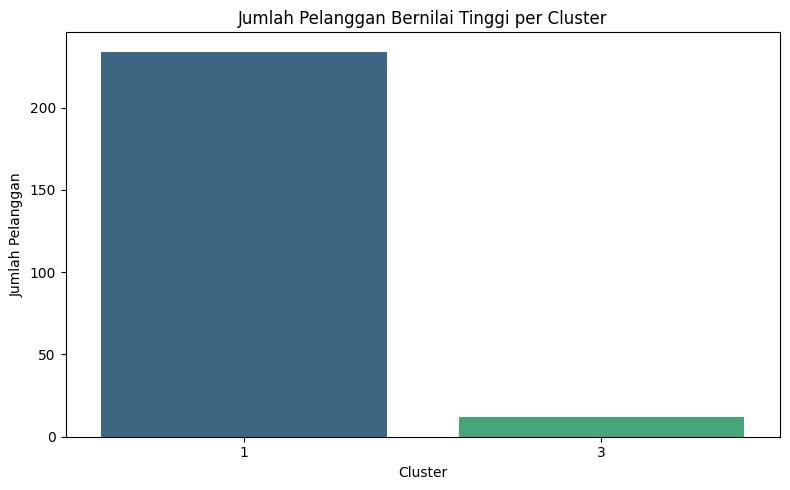

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30080\2167922274.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_30080\2167922274.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


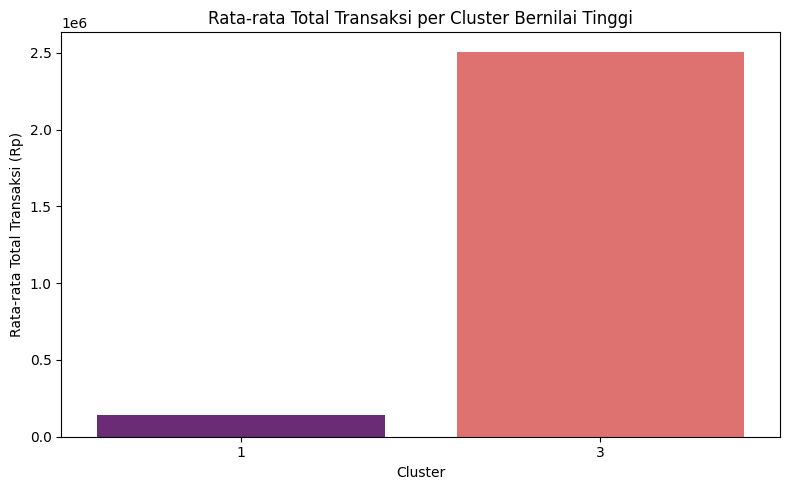

In [95]:
high_value_clusters = df_agg[df_agg['Cluster'].isin([1, 3])]  # Contoh: cluster 1 & 3 dianggap bernilai tinggi

# Visualisasi jumlah pelanggan per cluster bernilai tinggi
plt.figure(figsize=(8, 5))
sns.countplot(data=high_value_clusters, x='Cluster', palette='viridis')
plt.title('Jumlah Pelanggan Bernilai Tinggi per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

# Visualisasi nilai rata-rata transaksi per cluster
plt.figure(figsize=(8, 5))
sns.barplot(
    data=high_value_clusters,
    x='Cluster',
    y='Total_Transaksi',
    estimator='mean',
    ci=None,
    palette='magma'
)
plt.title('Rata-rata Total Transaksi per Cluster Bernilai Tinggi')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Total Transaksi (Rp)')
plt.tight_layout()
plt.show()